In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tuftelike
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath

In [13]:
from options import *
import matplotlib as mpl

mpl.rcParams.update(rcParams)

In [14]:
data_1 = np.loadtxt("../data/point_triple_1.csv", dtype = float, delimiter=",", skiprows=1)

data_2 = np.loadtxt("../data/point_triple_2.csv", dtype = float, delimiter=",", skiprows=1)

data_3 = np.loadtxt("../data/point_triple_3.csv", dtype = float, delimiter=",", skiprows=1)

data_4 = np.loadtxt("../data/point_triple_4.csv", dtype = float, delimiter=",", skiprows=1)

data_5 = np.loadtxt("../data/point_triple_5.csv", dtype = float, delimiter=",", skiprows=1)


data_1 = data_1 + [273.15,0]
data_2 = data_2 + [273.15,0]
data_3 = data_3 + [273.15,0]
data_4 = data_4 + [273.15,0]
data_5 = data_5 + [273.15,0]

deltaT = 0.1
deltaP = 1

Mesure 5: gros saut ignoré: aucun points pris
-15°C + fonte totale de la glace en 12 secondes

delta T = 0.1°C
delta P = 1 mbar


Text(0.5, 1.0, "Ensemble des données sur les courbes de changement d'état de l'azote")

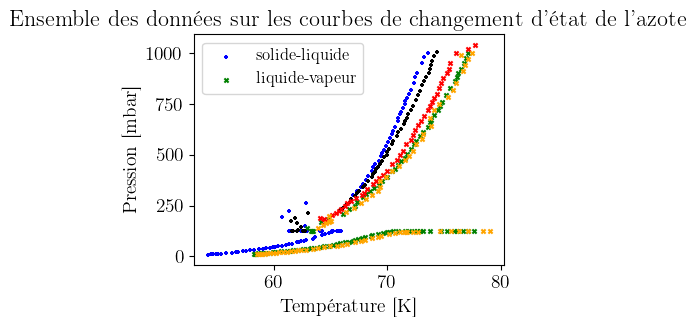

In [15]:
datas = np.concatenate([data_1, data_2, data_3, data_4, data_5])
# plt.scatter(datas[:,0], datasss[:,1])
plt.scatter(data_1[:,0], data_1[:,1], color="blue", marker="+", label="solide-liquide")
plt.scatter(data_2[:,0], data_2[:,1], color="green", marker="x", label="liquide-vapeur")
plt.scatter(data_3[:,0], data_3[:,1], color="black", marker="+")  #guarantee video solid-liquid
plt.scatter(data_4[:,0], data_4[:,1], color="red", marker="x")  #guarantee experiment started with no solid
plt.scatter(data_5[:,0], data_5[:,1], color="orange", marker="x")  #y a du solide au fond???? devrait pas

plt.legend()

plt.xlabel("Température [K]")
plt.ylabel("Pression [mbar]")
plt.title("Ensemble des données sur les courbes de changement d'état de l'azote")

# Courbe de sublimation

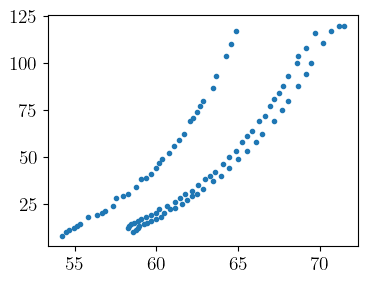

In [16]:
sublim = datas[datas[:,1] <= 120]
datas = datas[datas[:,1] > 120]
plt.scatter(sublim[:,0], sublim[:,1])

# Palier chelou

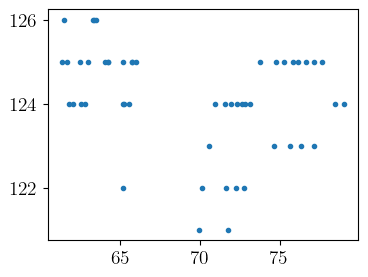

In [17]:
palier = datas[datas[:,1] <= 128]
datas = datas[datas[:,1] > 128]
plt.scatter(palier[:,0], palier[:,1])

# Courbe fusion

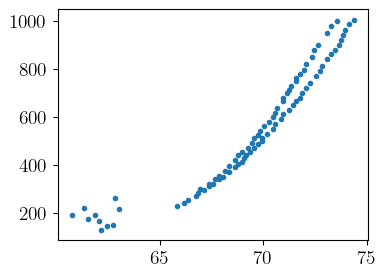

In [18]:
fusion_raw = np.concatenate([data_1, data_3])
fusion = fusion_raw[fusion_raw[:,1] > 128]
plt.scatter(fusion[:,0], fusion[:,1])

# Courbe vaporisation

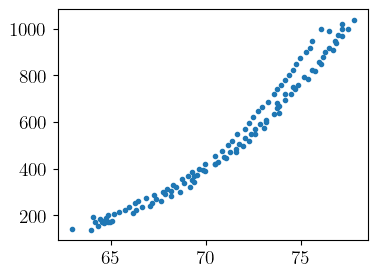

In [19]:
vapo_raw = np.concatenate([data_2, data_4, data_5])
vapo = vapo_raw[vapo_raw[:,1] > 128]
plt.scatter(vapo[:,0], vapo[:,1])

# Graphe complet

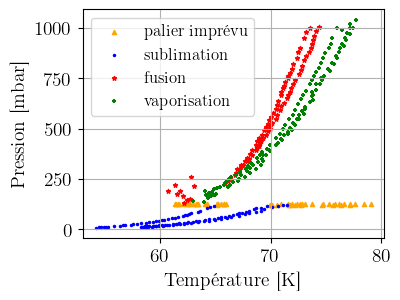

In [24]:
plt.scatter(palier[:,0], palier[:,1], marker="^", color="orange", label="palier imprévu")
plt.scatter(sublim[:,0], sublim[:,1], marker=".", color="blue", label="sublimation")
plt.scatter(fusion[:,0], fusion[:,1], marker="*", color="red", label="fusion")
plt.scatter(vapo[:,0], vapo[:,1], marker="+", color="green", label="vaporisation")

plt.legend()

plt.xlabel("Température [K]")
plt.ylabel("Pression [mbar]")
plt.grid()

plt.tight_layout(pad=0.5)
plt.savefig("../figures/etats_azote_all_data.pdf")

# Graphe plus joli

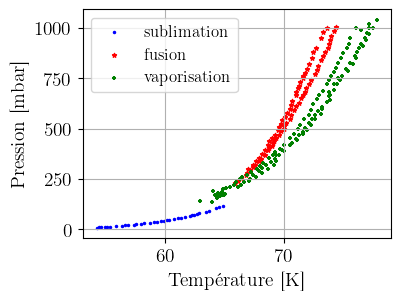

In [25]:
# plt.scatter(sublim[:,0], sublim[:,1], marker=".", color="blue", label="sublimation")
sublim_joli = data_1[data_1[:,1] <= 120]
plt.scatter(sublim_joli[:,0], sublim_joli[:,1], marker=".", color="blue", label="sublimation")

fusion_joli = fusion[fusion[:,0] > 65]
plt.scatter(fusion_joli[:,0], fusion_joli[:,1], marker="*", color="red", label="fusion")

plt.scatter(vapo[:,0], vapo[:,1], marker="+", color="green", label="vaporisation")
# vapo_joli_raw = np.concatenate([data_2, data_5])
# vapo_joli = vapo_joli_raw[vapo_joli_raw[:,1] > 128]
# plt.scatter(vapo_joli[:,0], vapo_joli[:,1], marker="x", color="green", label="vaporisation")


plt.legend()

plt.xlabel("Température [K]")
plt.ylabel("Pression [mbar]")
plt.grid()

plt.tight_layout(pad=0.5)
plt.savefig("../figures/etats_azote_clean.pdf")